<a href="https://colab.research.google.com/github/SalmaTafellahte/Horloge/blob/main/Mini_projet_D%E2%80%99application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Prétraitement des données*** 🗒

---





## **Importation des bibliothèques :**



In [ ]:
import pandas as pd
import numpy as np
import missingno as mso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



## ***Chargement du dataset :***



In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving study_performance.csv to study_performance.csv
User uploaded file "study_performance.csv" with length 72036 bytes


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**` Téléchargez l'ensemble de données depuis Kaggle `**

In [ ]:
!kaggle datasets download -d bhavikjikadara/student-study-performance

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance
License(s): Attribution 4.0 International (CC BY 4.0)
student-study-performance.zip: Skipping, found more recently modified local copy (use --force to force download)


***`Décompressez l'ensemble de données`***

In [ ]:
!unzip student-study-performance.zip

Archive:  student-study-performance.zip
replace study_performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: study_performance.csv   


## ***Exploration des données :***

***`Chargez l'ensemble de données dans un DataFrame Pandas et affichez les premières lignes du jeu de données`***

In [ ]:
data = pd.read_csv('study_performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


***`Vérifiez les types de données de chaque colonne.`***

In [ ]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

***`Vérifiez la présence de valeurs manquantes.`***

In [ ]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## ***Prétraitement des données***

***`Gérer les valeurs manquantes`***

In [ ]:
imputer = SimpleImputer(strategy="mean")
data[["math_score", "reading_score", "writing_score"]] = imputer.fit_transform(data[["math_score", "reading_score", "writing_score"]])

***`Encodage des variables catégorielles`***

In [ ]:
encoder = OneHotEncoder(drop="first")
transformer = ColumnTransformer(transformers=[("onehot", encoder, ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"])], remainder="passthrough")
data_encoded = transformer.fit_transform(data)


***`Normalisation des données numériques`***

In [ ]:
scaler = StandardScaler()
data_encoded[:, -3:] = scaler.fit_transform(data_encoded[:, -3:])

In [ ]:
encoded_columns = transformer.get_feature_names_out()

***`Création d'un nouveau dataframe avec les données prétraitées`***

In [ ]:
data_preprocessed = pd.DataFrame(data_encoded, columns=encoded_columns)

***`Afficher les premières lignes du dataframe prétraité`***

In [ ]:
data_preprocessed.head()

,onehot__gender_male,onehot__race_ethnicity_group B,onehot__race_ethnicity_group C,onehot__race_ethnicity_group D,onehot__race_ethnicity_group E,onehot__parental_level_of_education_bachelor's degree,onehot__parental_level_of_education_high school,onehot__parental_level_of_education_master's degree,onehot__parental_level_of_education_some college,onehot__parental_level_of_education_some high school,onehot__lunch_standard,onehot__test_preparation_course_none,remainder__math_score,remainder__reading_score,remainder__writing_score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.390024,0.193999,0.391492
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.192076,1.427476,1.313269
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.577711,1.770109,1.642475
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.653954,0.605158,0.457333


# ***Analyse exploratoire des données*** 🗒

---



**L**'analyse exploratoire des données (AED) joue un rôle crucial en permettant une compréhension approfondie de la structure, des tendances et des anomalies présentes dans un ensemble de données. En identifiant les schémas cachés, en détectant les erreurs et les incohérences, et en facilitant la prise de décisions éclairées sur les techniques d'analyse et les modèles à utiliser.

## ***Etape 0: Apercu des donnees***

In [ ]:
data.shape

(1000, 8)

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [ ]:
data.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                     float64
reading_score                  float64
writing_score                  float64
dtype: object

<Axes: ylabel='count'>

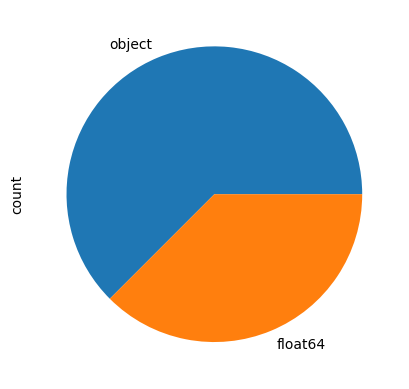

In [ ]:
data.dtypes.value_counts().plot.pie()


##  ***Etape 1 : Statistiques descriptives***


In [ ]:
# Calculez les statistiques descriptives pour les variables numériques (math_score, reading_score, writing_score).
# Cela inclut la moyenne, l'écart-type, le minimum, le maximum, les quartiles, etc.
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## ***Etape 2 : Analyse univariée***

In [ ]:
# Comptage des occurrences pour une variable catégorielle (par exemple, gender)
data['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

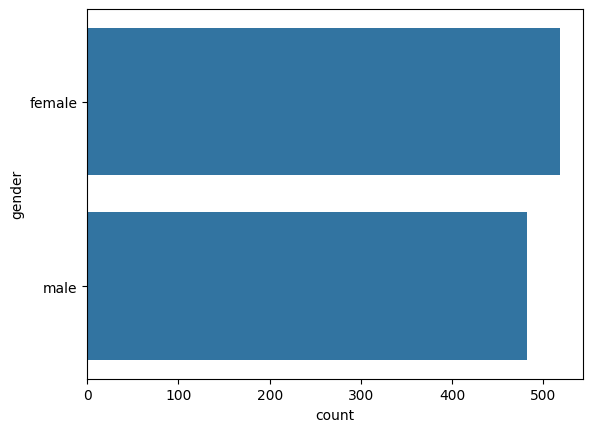

In [ ]:
# Visualisation avec un diagramme en barres
sns.countplot(data['gender'])
plt.show()

<Axes: xlabel='math_score'>

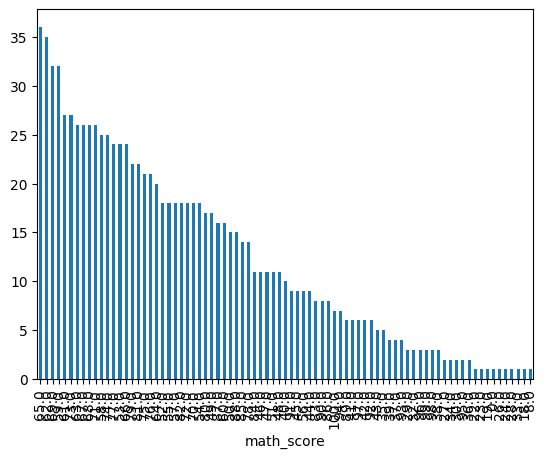

In [ ]:
data['math_score'].value_counts().plot.bar()

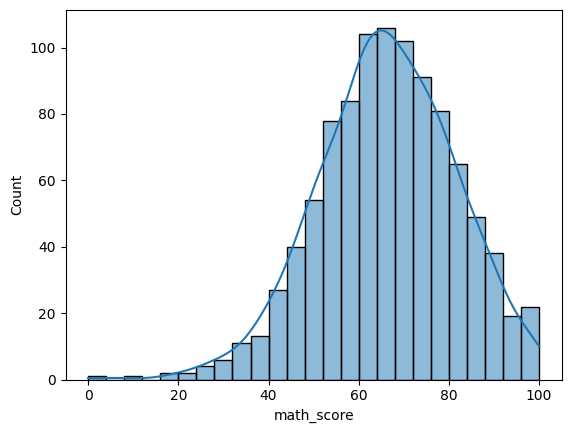

In [ ]:
# Distribution de la variable cible (math_score)
sns.histplot(data['math_score'], kde=True)
plt.show()

<Axes: >

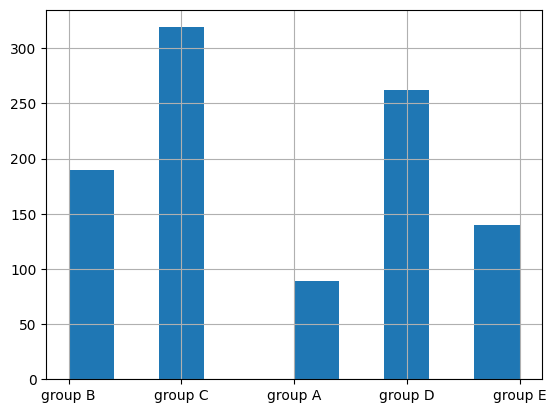

In [ ]:
data['race_ethnicity'].hist()

<Axes: ylabel='count'>

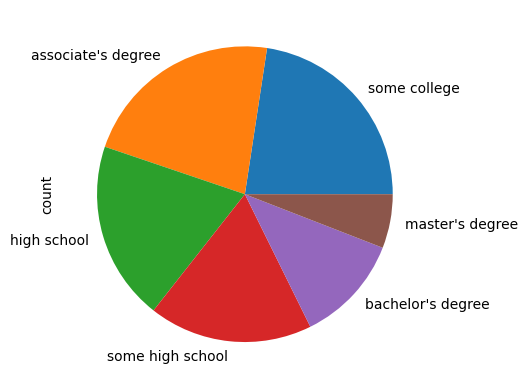

In [ ]:
data['parental_level_of_education'].value_counts().plot.pie()

## ***Etape 3 :Analyse bivariée***

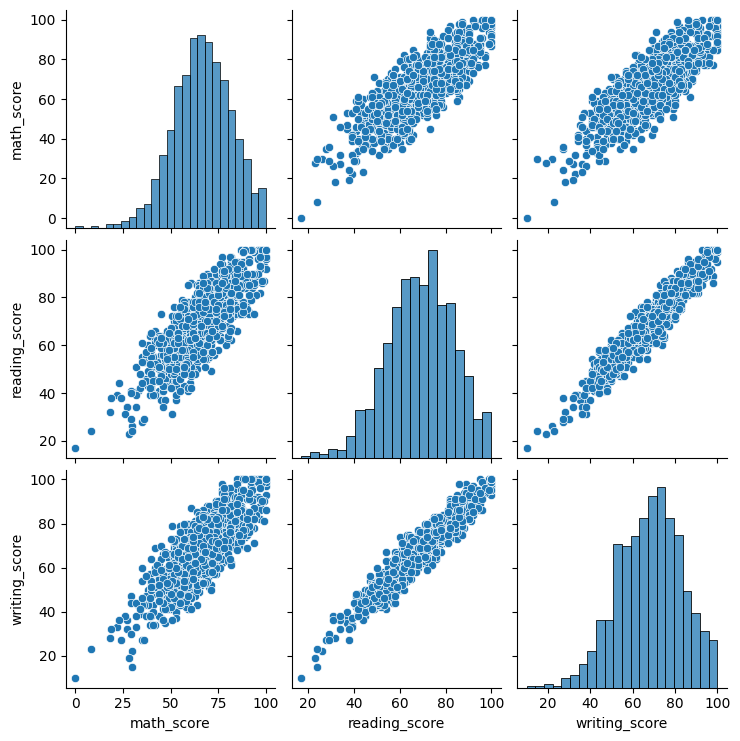

In [ ]:
# Comparaison des scores en mathématiques avec les autres scores
sns.pairplot(data[['math_score', 'reading_score', 'writing_score']])
plt.show()

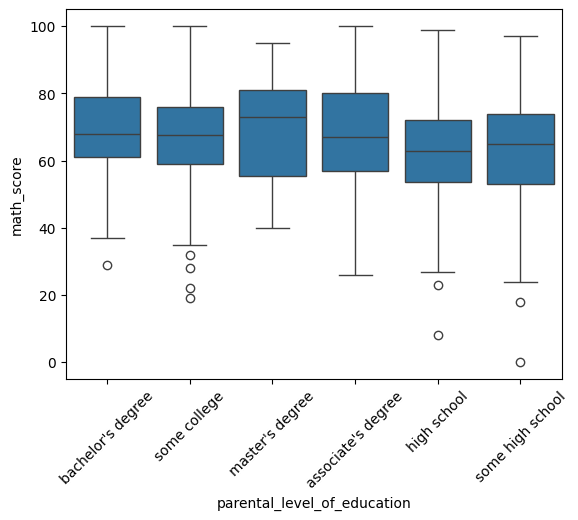

In [ ]:
# Comparaison entre la variable cible (math_score) et une variable catégorielle (par exemple, parental_level_of_education)
sns.boxplot(x='parental_level_of_education', y='math_score', data=data)
plt.xticks(rotation=45)
plt.show()

##  ***Etape 4 :Analyse multivariée***




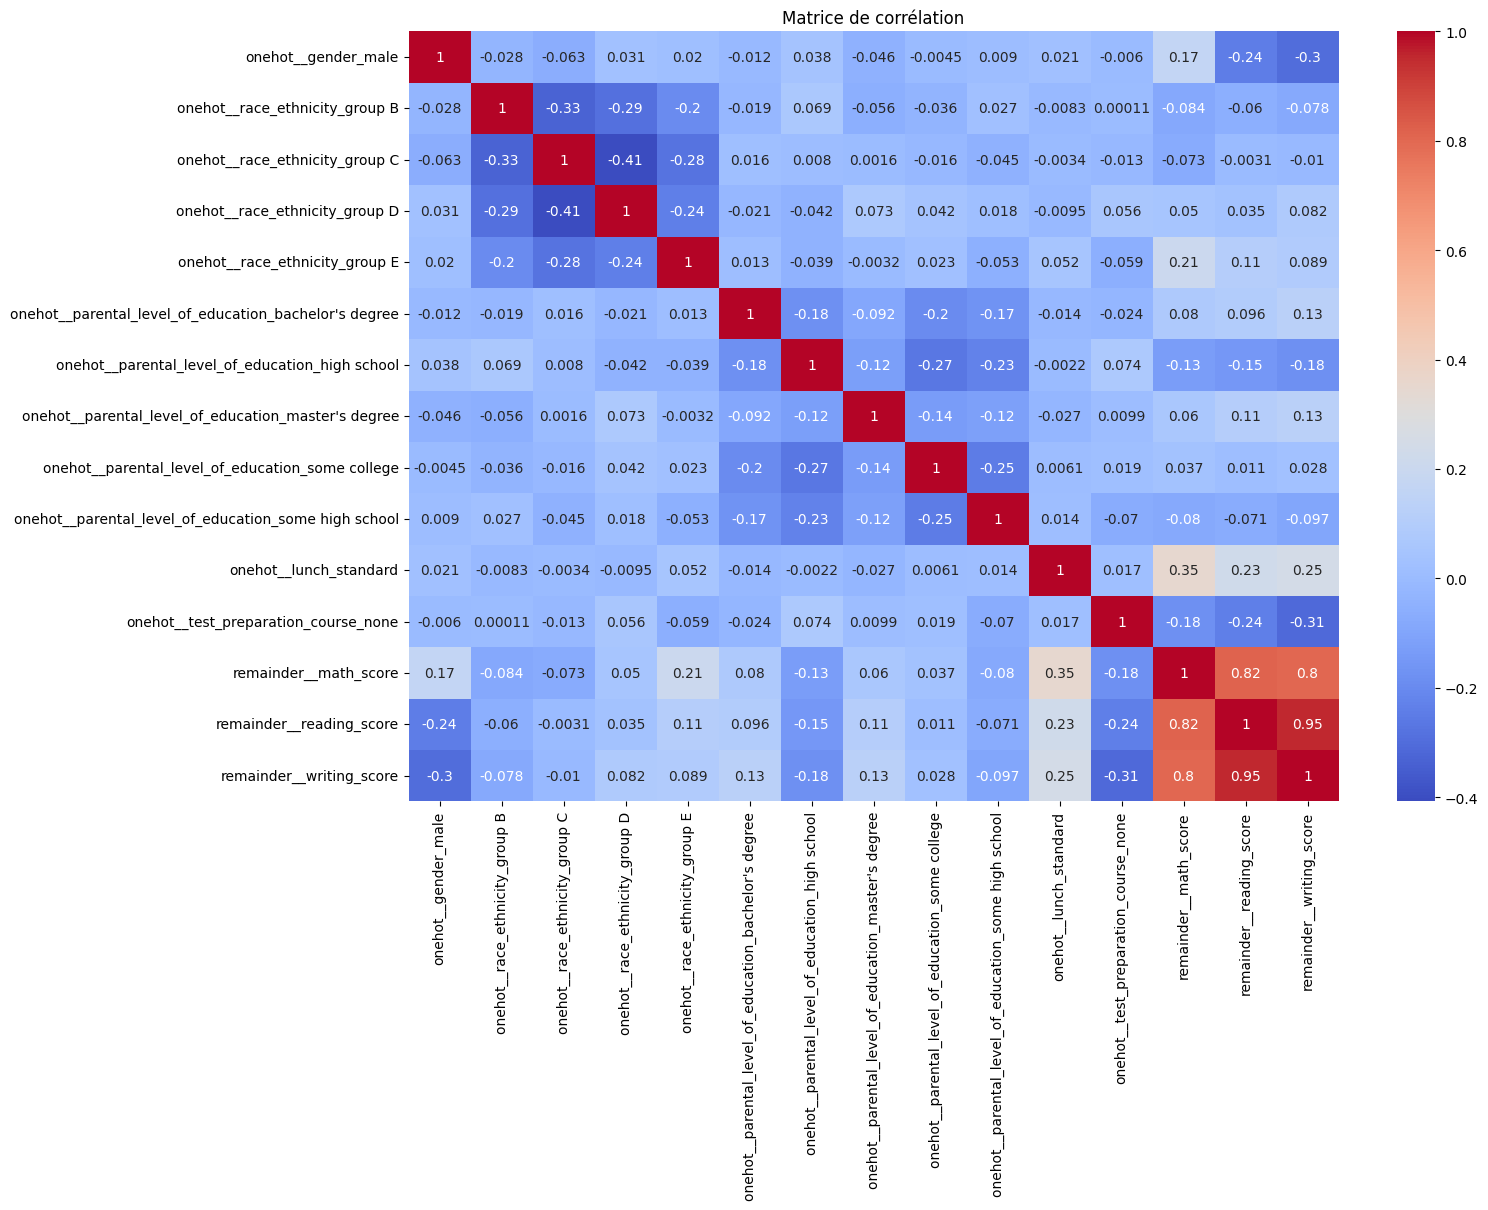

In [ ]:
# Matrice de corrélation
# Convertir data_encoded en un dataframe pandas
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_columns)
# Calcul de la matrice de corrélation
corr_matrix = data_encoded_df.corr()
# Visualisation de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## ***Etape 5 :Analyse des données manquantes***

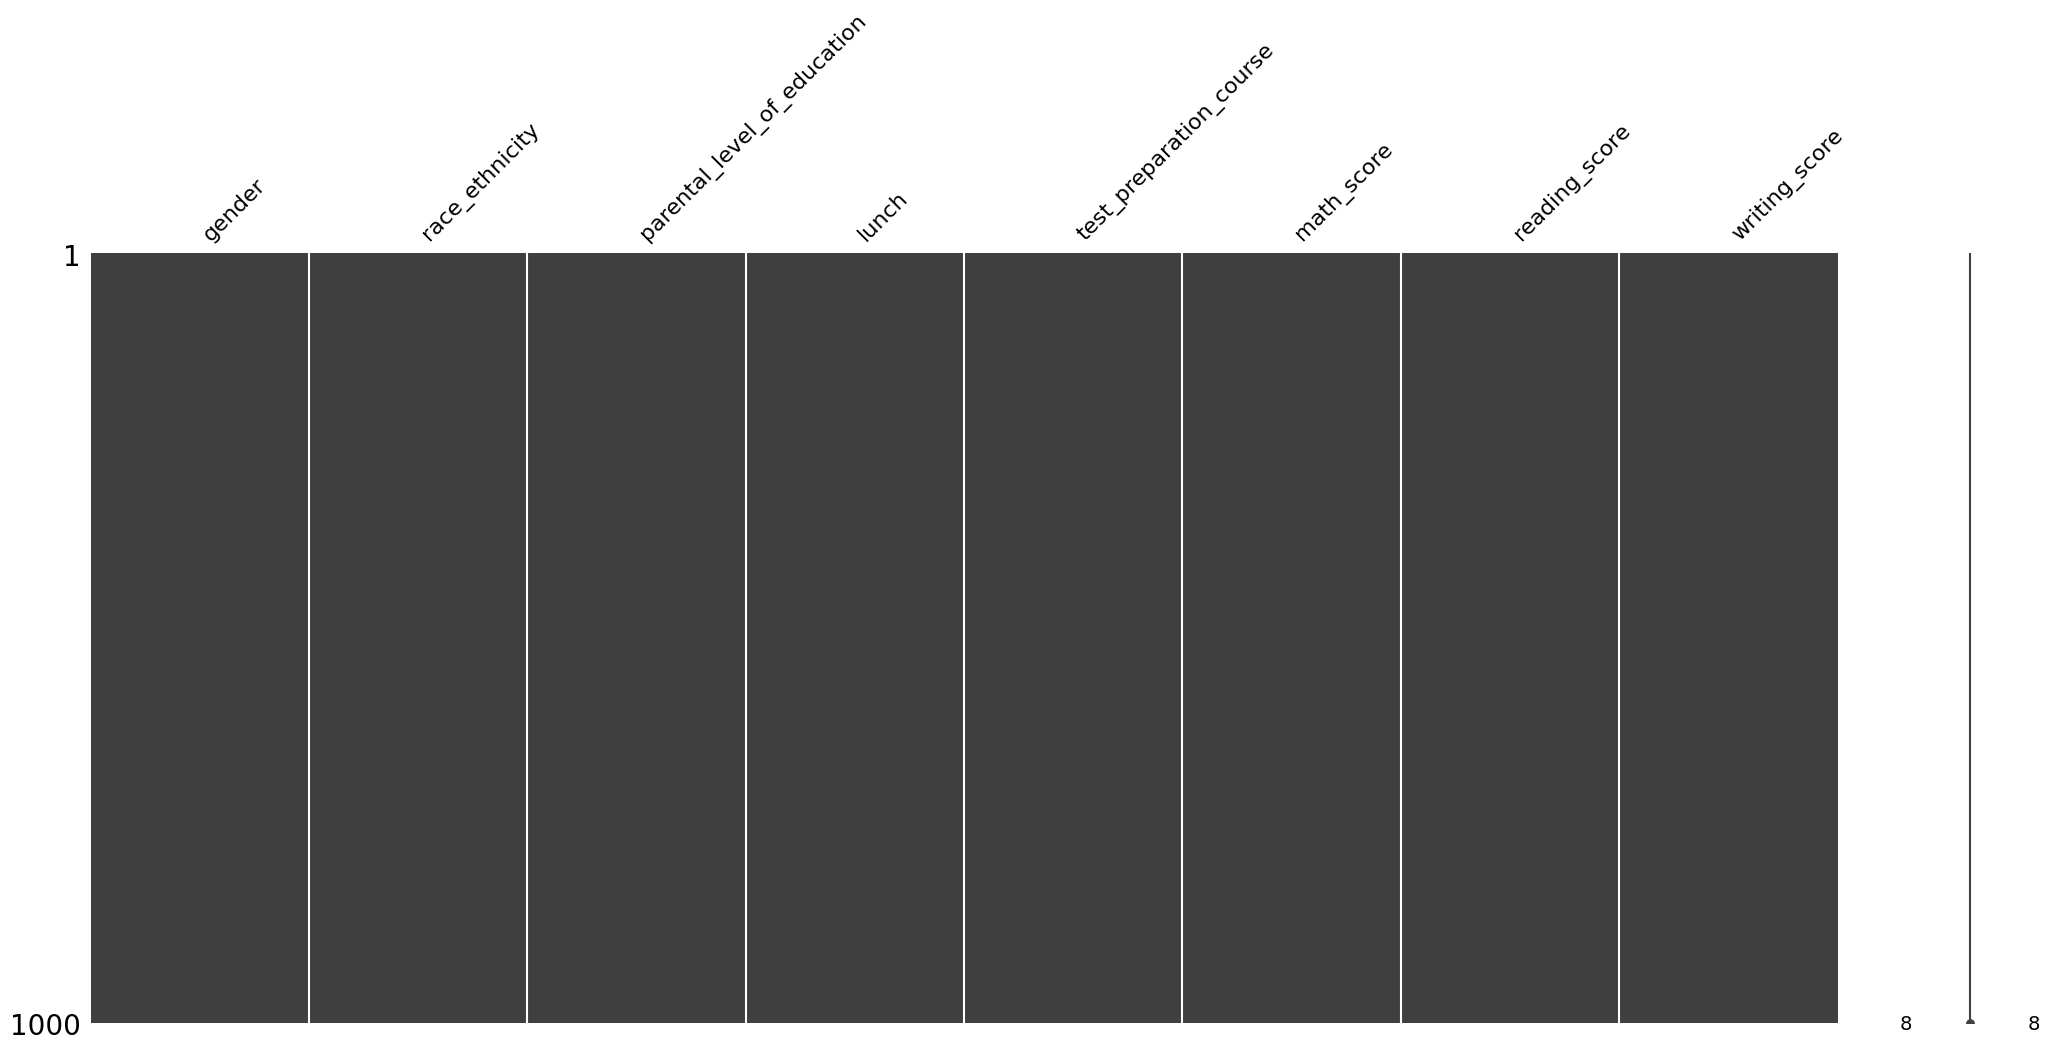

In [ ]:
#Visualisation de l'emplacement des valeurs manquantes
mso.matrix(data)
plt.show()

## ***Etape 6: Recherche de valeurs aberrantes***

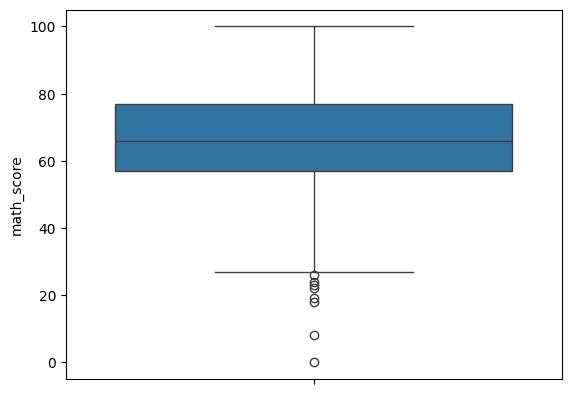

In [ ]:
# Identification des valeurs aberrantes potentielles dans math_scores
sns.boxplot(data['math_score'])
plt.show()

## ***Etape 7:Relations entre les variables***

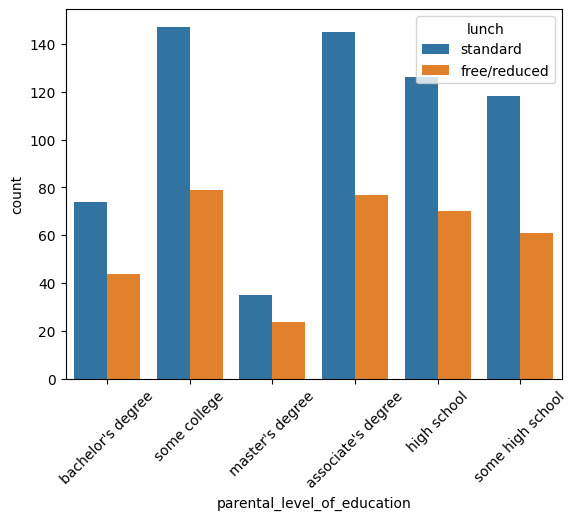

In [ ]:
# Exploration des relations entre les variables (par exemple, parental_level_of_education et lunch)
sns.countplot(x='parental_level_of_education', hue='lunch', data=data)
plt.xticks(rotation=45)
plt.show()

## ***Etape 8: Visualisations supplémentaires***

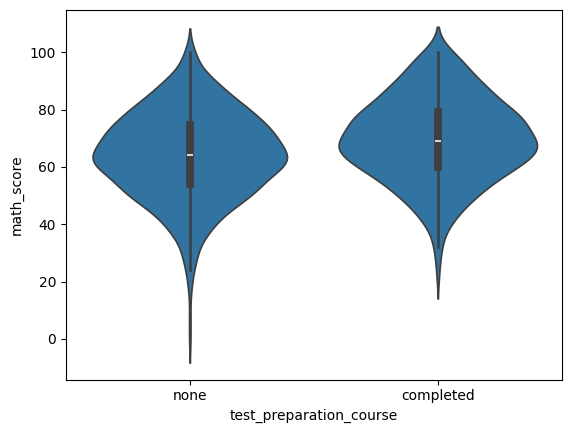

In [ ]:
# Utilisation de visualisations supplémentaires comme des diagrammes en violon
sns.violinplot(x='test_preparation_course', y='math_score', data=data)
plt.show()

# ***Mise en œuvre des algorithmes d’apprentissage*** 🗒

---



## ***Modèle 1 : Régression Ridge***

### ***Séparation du dataset en caractéristiques (features) et variable cible(target)***

In [ ]:
# Séparation des caractéristiques (features) et de la variable cible
X = data_preprocessed.drop(['remainder__math_score', 'remainder__reading_score', 'remainder__writing_score'], axis=1)
Y = data_preprocessed['remainder__math_score']

# Affichage des caractéristiques (features) du jeu de données
print("Caractéristiques de notre ensemble de données :")
print(X.head())

# Affichage de la variable cible
print("\nNotre variable cible :")
print(Y.head())

Caractéristiques de notre ensemble de données :
   onehot__gender_male  onehot__race_ethnicity_group B  \
0                  0.0                             1.0   
1                  0.0                             0.0   
2                  0.0                             1.0   
3                  1.0                             0.0   
4                  1.0                             0.0   

   onehot__race_ethnicity_group C  onehot__race_ethnicity_group D  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   onehot__race_ethnicity_group E  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4  

### ***Division du dataset en ensembles d'entraînement et de test***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### ***Création , entraînement et évaluation du modèle***

In [ ]:
from sklearn.linear_model import Ridge
# Créer une instance du modèle de régression Ridge
modele1 = Ridge(alpha=1.0)

# Entraîner le modèle sur l'ensemble d'entraînement
modele1.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = modele1.predict(X_test)

### ***Mesure de la précision du modèle de régression ridge***

In [ ]:
from sklearn.metrics import mean_squared_error
# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les performances du modèle
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

coefficients = modele1.coef_
intercept = modele1.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


RMSE: 0.9347438002665852
Coefficients: [ 2.96104576e-01 -4.52747503e-04  2.75218945e-02  2.24973534e-01
  5.82263950e-01  2.04151988e-01 -2.67829322e-01  7.04155561e-02
 -8.81512718e-03 -1.90039256e-01  7.56494822e-01 -3.85639986e-01]
Intercept: -0.44776508161343276


## ***Modèle 2 : Arbres de décision***

### ***Création , entraînement et évaluation du modèle***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Créer une instance du modèle de régression par arbres de décision
modele2 = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
modele2.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions_arbre = modele2.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les performances du modèle
rmse_arbre = np.sqrt(mean_squared_error(y_test, predictions_arbre))
print("RMSE (Arbre de décision):", rmse_arbre)


RMSE (Arbre de décision): 1.0621972757549993


## ***Modèle 3 : Régression linéaire***

### ***Création , entraînement et évaluation du modèle***

In [ ]:
from sklearn.linear_model import LinearRegression
# Créer une instance du modèle de régression Ridge
modele3  = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
modele3.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions_lineaire = modele3.predict(X_test)

### ***Mesure de la précision du modèle de régression linéaire***

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# R2 score
print("R2 : ", r2_score(y_test, predictions_lineaire))
# Mean Absolute Error
print("MAE :", mean_absolute_error(y_test,predictions_lineaire))
# Root Mean Squared Error
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_lineaire)))

R2 :  0.17599998338251177
MAE : 0.7436161960497654
RMSE: 0.9343267030000965


# ***Établir une grille d’évaluation des algorithmes avec les différentes métriques & Comparaison avec la moyenne des notes***

In [ ]:
# Import des bibliothèques nécessaires
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calcul des métriques pour la régression linéaire
r2_linear = r2_score(y_test, predictions_lineaire)
mae_linear = mean_absolute_error(y_test, predictions_lineaire)
rmse_linear = np.sqrt(mean_squared_error(y_test, predictions_lineaire))

 # Calcul des métriques pour la régression Ridge
r2_ridge = r2_score(y_test, predictions)
mae_ridge = mean_absolute_error(y_test, predictions)
rmse_ridge = rmse
# Calcul des métriques pour l'arbre de décision
r2e_decision_tree = r2_score(y_test, predictions)
maee_decision_tree = mean_absolute_error(y_test, predictions)
rmse_decision_tree = rmse_arbre

# Calcul des métriques pour l'approche de la moyenne des notes
r2_mean = r2_score(y_test, predictions_mean)
mae_mean = mean_absolute_error(y_test, predictions_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, predictions_mean))

# Affichage des résultats
print("Métriques pour la régression linéaire :")
print("R² :", r2_linear)
print("MAE :", mae_linear)
print("RMSE :", rmse_linear)
print()


print("Métriques pour la régression Ridge :")
print("R² :", r2_ridge)
print("MAE :", mae_ridge)
print("RMSE :", rmse_ridge)
print()

print("Métriques pour l'arbre de décision :")
print("R² :", r2e_decision_tree)
print("MAE :", maee_decision_tree)
print("RMSE  :", rmse_decision_tree)
print()

print("Métriques pour l'approche de la moyenne des notes :")
print("R² :", r2_mean)
print("MAE :", mae_mean)
print("RMSE :", rmse_mean)



Métriques pour la régression linéaire :
R² : 0.17599998338251177
MAE : 0.7436161960497654
RMSE : 0.9343267030000965

Métriques pour la régression Ridge :
R² : 0.17526412756858056
MAE : 0.7441572728014405
RMSE : 0.9347438002665852

Métriques pour l'arbre de décision :
R² : 0.17526412756858056
MAE : 0.7441572728014405
RMSE  : 1.0621972757549993

Métriques pour l'approche de la moyenne des notes :
R² : -0.01703929204145327
MAE : 0.814216140660794
RMSE : 1.0380159257975696


***En comparant ces résultats avec ceux de l'approche de la moyenne des notes, nous pouvons voir que les modèles d'apprentissage automatique (régression linéaire, régression Ridge et arbre de décision) ont tous des performances nettement meilleures en termes de R², MAE et RMSE..***
***En effet, l'approche de la moyenne des notes présente un R² négatif, ce qui signifie qu'elle est moins efficace que de simplement prédire la moyenne pour toutes les observations. En revanche, les modèles d'apprentissage automatique ont des valeurs de R² positives, indiquant qu'ils capturent une partie de la variance des données et sont donc plus performants que l'approche de la moyenne des notes.En termes de MAE et RMSE, les modèles d'apprentissage automatique présentent également des valeurs inférieures à celles de l'approche de la moyenne des notes, ce qui confirme leur meilleure efficacité pour prédire les scores des élèves.
Ainsi, ces résultats montrent que les modèles d'apprentissage automatique sont plus efficaces que l'approche simple de la moyenne des notes pour prédire les scores des élèves, ce qui justifie l'utilisation de ces modèles plus complexes dans ce contexte.***



# **Visualisation de comparaison**

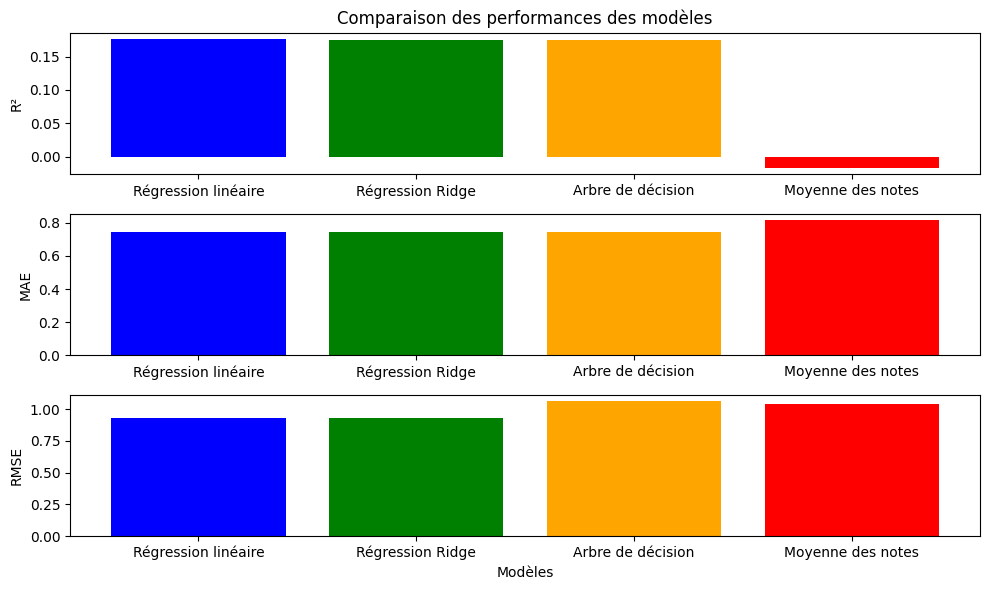

In [ ]:
import matplotlib.pyplot as plt

# Métriques pour chaque modèle
r2_scores = [r2_linear, r2_ridge, r2e_decision_tree, r2_mean]
mae_scores = [mae_linear, mae_ridge, maee_decision_tree, mae_mean]
rmse_scores = [rmse_linear, rmse_ridge, rmse_decision_tree, rmse_mean]

# Noms des modèles
models = ['Régression linéaire', 'Régression Ridge', 'Arbre de décision', 'Moyenne des notes']

# Couleurs pour chaque modèle
colors = ['blue', 'green', 'orange', 'red']

# Création du graphe
plt.figure(figsize=(10, 6))

# R²
plt.subplot(3, 1, 1)
plt.bar(models, r2_scores, color=colors)
plt.ylabel('R²')
plt.title('Comparaison des performances des modèles')

# MAE
plt.subplot(3, 1, 2)
plt.bar(models, mae_scores, color=colors)
plt.ylabel('MAE')

# RMSE
plt.subplot(3, 1, 3)
plt.bar(models, rmse_scores, color=colors)
plt.ylabel('RMSE')
plt.xlabel('Modèles')

# Affichage du graphe
plt.tight_layout()
plt.show()


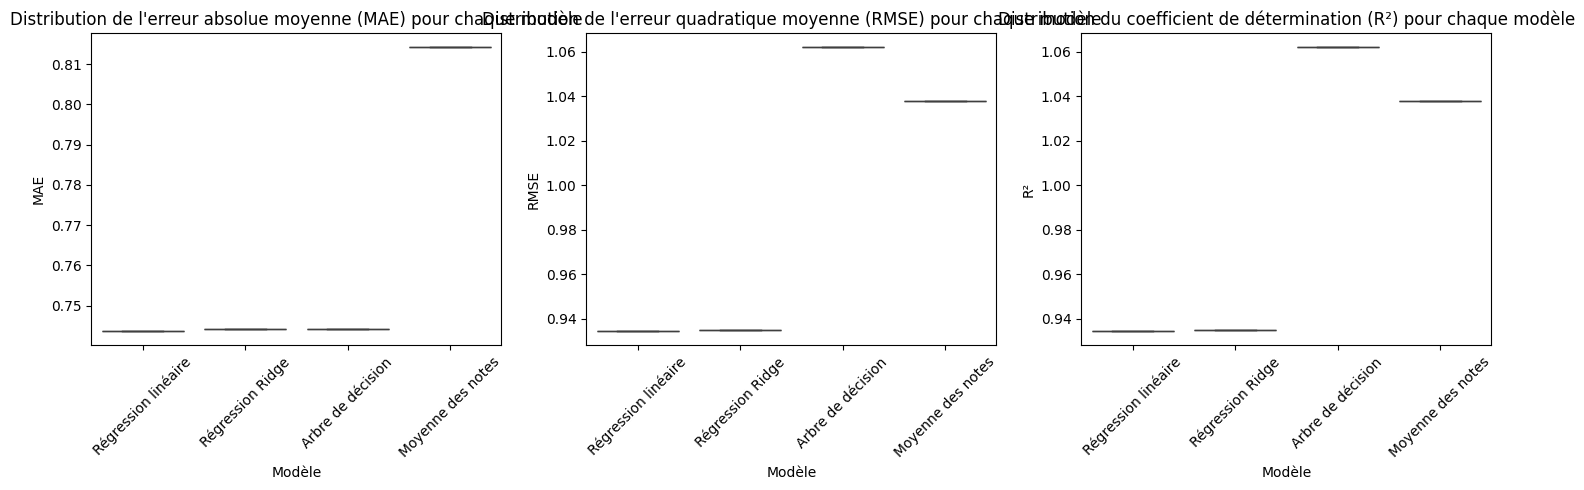

In [ ]:
import seaborn as sns

# Création d'un DataFrame pour stocker les résultats
results = pd.DataFrame({
    'Modèle': ['Régression linéaire', 'Régression Ridge', 'Arbre de décision', 'Moyenne des notes'],
    'MAE': [mae_linear, mae_ridge, maee_decision_tree, mae_mean],
    'RMSE': [rmse_linear, rmse_ridge, rmse_decision_tree, rmse_mean],
    'R²': [rmse_linear, rmse_ridge, rmse_decision_tree, rmse_mean]
})

# Diagramme en boîte pour MAE
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=results, x='Modèle', y='MAE')
plt.title('Distribution de l\'erreur absolue moyenne (MAE) pour chaque modèle')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# Diagramme en boîte pour RMSE
plt.subplot(1, 3, 2)
sns.boxplot(data=results, x='Modèle', y='RMSE')
plt.title('Distribution de l\'erreur quadratique moyenne (RMSE) pour chaque modèle')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

# Diagramme en boîte pour R²
plt.subplot(1, 3, 3)
sns.boxplot(data=results, x='Modèle', y='R²')
plt.title('Distribution du coefficient de détermination (R²) pour chaque modèle')
plt.ylabel('R²')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


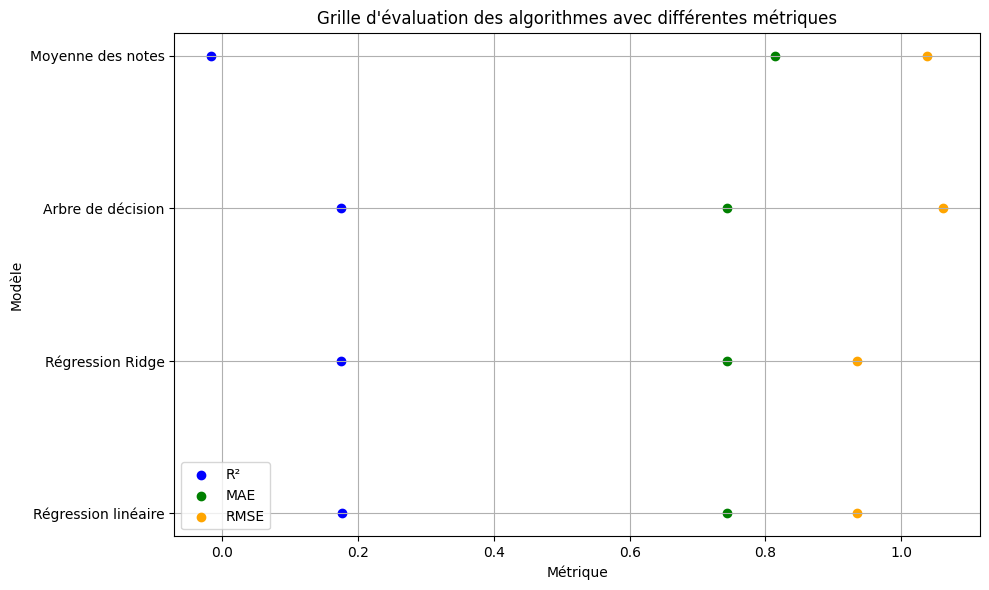

In [ ]:
import matplotlib.pyplot as plt

# Création d'un DataFrame pour stocker les résultats
results = pd.DataFrame({
    'Modèle': ['Régression linéaire', 'Régression Ridge', 'Arbre de décision', 'Moyenne des notes'],
    'R²': [r2_linear, r2_ridge, r2e_decision_tree, r2_mean],
    'MAE': [mae_linear, mae_ridge, maee_decision_tree, mae_mean],
    'RMSE': [rmse_linear, rmse_ridge, rmse_decision_tree, rmse_mean]
})

# Couleurs pour chaque modèle
colors = ['blue', 'green', 'orange', 'red']

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer les nuages de points pour chaque métrique
for i, metric in enumerate(['R²', 'MAE', 'RMSE']):
    plt.scatter(results[metric], results['Modèle'], color=colors[i], label=metric)

# Personnalisation du graphique
plt.title('Grille d\'évaluation des algorithmes avec différentes métriques')
plt.xlabel('Métrique')
plt.ylabel('Modèle')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


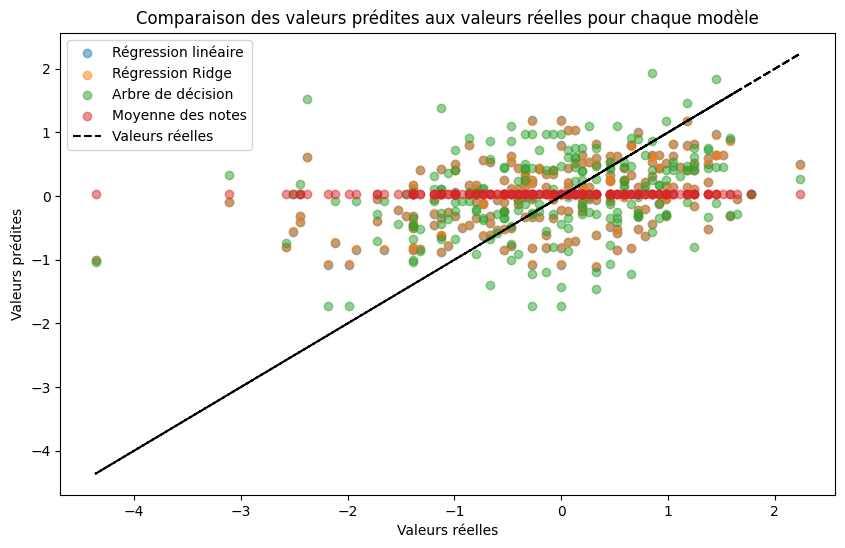

In [ ]:
# Diagramme de dispersion pour chaque modèle
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_lineaire, label='Régression linéaire', alpha=0.5)
plt.scatter(y_test, predictions, label='Régression Ridge', alpha=0.5)
plt.scatter(y_test, predictions_arbre, label='Arbre de décision', alpha=0.5)
plt.scatter(y_test, predictions_mean, label='Moyenne des notes', alpha=0.5)
plt.plot(y_test, y_test, color='black', linestyle='--', label='Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des valeurs prédites aux valeurs réelles pour chaque modèle')
plt.legend()
plt.show()
